# Reading data using pandas
**Pandas**: popular Python library for data exploration, manipulation, and analysis

In [1]:
import pandas as pd

In [7]:
data=pd.read_csv("Advertising.csv")

In [8]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [17]:
data=pd.read_csv("Advertising.csv", index_col=0)
print(data.head())
print(data.columns)

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


# Visualizing data using seaborn
**Seaborn**: Python library for statistical data visualization built on top of Matplotlib

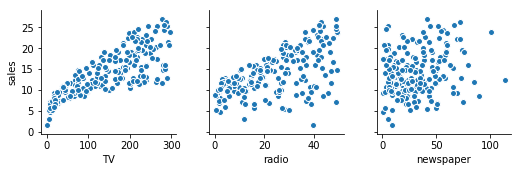

In [22]:
import seaborn as sns
sns.pairplot(data, x_vars=['TV','radio', 'newspaper'],y_vars=['sales'])

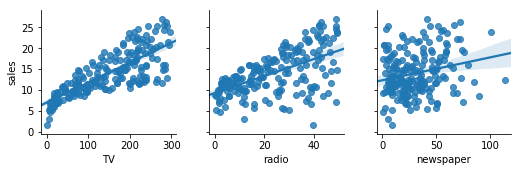

In [23]:
sns.pairplot(data, x_vars=['TV','radio', 'newspaper'],y_vars=['sales'],kind="reg")

# Linear regression
**Pros**: fast, no tuning required, highly interpretable, well-understood

**Cons**: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

**Form of linear regression**
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

$y$ is the response
$\beta_0$ is the intercept
$\beta_1$ is the coefficient for $x_1$ (the first feature)
$\beta_n$ is the coefficient for $x_n$ (the nth feature)
In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

In [27]:
feature_col=['TV','radio','newspaper']
X=data[feature_col]
y=data['sales']
print(X.shape)
print(y.shape)


(200, 3)
(200,)


In [28]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4)

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print(linreg.intercept_)
print(linreg.coef_)

3.094010860844463
[0.04585077 0.17764264 0.00247669]


In [31]:
y_pred=linreg.predict(X_test)
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

1.073889439397554


## Linear Regression mdel without newspaper as a feature


In [38]:
# create a Python list of feature names
feature_col = ['TV', 'radio','newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_col]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4459051240315897


In [37]:
# create a Python list of feature names
feature_col = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_col]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4364054578775054


The **RMSE** decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.